In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Read in the data and store in a DataFrame
df = pd.read_csv("data/titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [43]:

# Print the first 5 rows of the DataFrame
df['seasons'] = df['seasons'].fillna(1)
df = df.drop(['description', 'title','id','production_countries','imdb_id','age_certification'], axis='columns')
df.dropna(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5131 entries, 1 to 5849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             5131 non-null   object 
 1   release_year     5131 non-null   int64  
 2   runtime          5131 non-null   int64  
 3   genres           5131 non-null   object 
 4   seasons          5131 non-null   float64
 5   imdb_score       5131 non-null   float64
 6   imdb_votes       5131 non-null   float64
 7   tmdb_popularity  5131 non-null   float64
 8   tmdb_score       5131 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 400.9+ KB


In [45]:
df['genreMain'] = df['genres'].apply(lambda x: x.split(',')[0])

genre_mapping = {
#     "['documentation']": "documentary",
#     "['drama']": "drama",
#     "['fantasy']": "fantasy",
#     "['war']": "war",
#     "['comedy']": "comedy",
#     "['thriller']": "thriller",
#     "['crime']": "crime",
#     "['romance']": "romance",
#     "['action']": "action",
#     "['western']": "western",
#     "['history']": "history",
#     "['music']": "music",
#     "['horror']": "horror",
#     "['scifi']": "sci-fi",
#     "['animation']": "animation",
#     "['family']": "family",
#     "['reality']": "reality",
#     '[]': "unknown",
#     "['sport']": "sport"
    
    "['documentation']": "documentary",
    "['drama'": "drama",
    "['fantasy'": "fantasy",
    "['war'": "war",
    "['comedy'": "comedy",
    "['comedy']": "comedy",
    "['thriller'": "thriller",
    "['crime'": "crime",
    "['romance'": "romance",
    "['action'": "action",
    "['western'": "western",
    "['history'": "history",
    "['drama']": "drama",
    "['music'": "music",
    "['romance']": "romance",
    "['horror'": "horror",
    "['horror'": "horror",
    "['scifi'": "sci-fi",
    "['animation'": "animation",
    "['family'": "family",
    "['family']": "family",
    "['reality']": "reality",
    "['reality'": "reality",
    "['documentation'": "documentary",
    '[]': "unknown",
    "['thriller']": "thriller",
    "['western']": "western",
    "['animation']": "animation",
    "['war']": "war",
    "['music']": "music",
    "['fantasy']": "fantasy",
    "['action']": "action",
    "['crime']": "crime",
    "['scifi']": "sci-fi",
    "['sport'": "sport"
}

df['genreMain'] = df['genreMain'].map(genre_mapping)
df.columns

Index(['type', 'release_year', 'runtime', 'genres', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'genreMain'],
      dtype='object')

In [46]:
oneHotdf=df[['release_year', 'runtime','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score','genreMain']]
oneHotdf.dropna(inplace=True)
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(oneHotdf[['genreMain']]).toarray())
final_df = pd.concat([oneHotdf.reset_index(drop=True), encoder_df], axis=1)
new_names = {0:'action',
             1:'animation',
             2:'comedy',
             3:'crime',
             4:'documentary',
             5:'drama',
             6:'family',
             7:'fantasy',
             8:'history',
             9:'horror',
             10:'music',
             11:'reality',
             12:'romance',
             13:'sci-fi',
             14:'sport',
             15:'thriller',
             16:'unknown',
             17:'war',
             18:'western'}
final_df = final_df.rename(columns=new_names)

C:\Users\drewj\AppData\Local\Temp\ipykernel_22052\2406819631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneHotdf.dropna(inplace=True)


In [47]:
final_df[final_df['genreMain']=='fantasy']

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genreMain,action,animation,...,horror,music,reality,romance,sci-fi,sport,thriller,unknown,war,western
2,1975,91,1.0,8.2,534486.0,15.461,7.811,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,1998,104,1.0,6.1,58670.0,10.108,6.300,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,2008,92,1.0,6.4,476593.0,121.985,6.330,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,2007,80,1.0,6.1,511.0,47.660,7.600,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,2009,114,1.0,7.5,5467.0,39.946,7.500,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,2021,50,1.0,6.2,72.0,6.557,8.900,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4767,2021,90,1.0,4.8,1452.0,36.942,5.900,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4851,2021,80,1.0,5.5,830.0,39.563,5.800,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4875,2021,99,1.0,5.8,751.0,6.608,6.300,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df['genreMain'].unique()

array(['drama', 'fantasy', 'war', 'comedy', 'thriller', 'crime',
       'romance', 'action', 'western', 'history', 'documentary', 'music',
       nan, 'horror', 'sci-fi', 'animation', 'family', 'reality',
       'unknown', 'sport'], dtype=object)

In [49]:
cols_to_normalize = ['imdb_score', 'tmdb_score', 'imdb_votes']

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(final_df[cols_to_normalize])

# Transform the columns
final_df[cols_to_normalize] = scaler.transform(final_df[cols_to_normalize])

## Lasso Regression

In [50]:
X = final_df[['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_score','documentary', 'drama', 'fantasy', 'war', 'comedy', 'thriller',
       'crime', 'romance', 'action', 'western', 'history', 'music','horror', 'sci-fi', 'animation', 'family', 'reality', 'unknown',
       'sport']]
y = final_df['tmdb_popularity']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# print the coefficients
print(lasso.coef_)
print(lasso.intercept_)

# make predictions on the test set and calculate the R-squared score
y_pred = lasso.predict(X_test)
print(lasso.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)
print("R-Squared: {:.2f}".format(r2))

[  1.38154477   0.09561298   6.77919567  -4.15631885  12.51690763
   5.7220799  -12.69642127  -3.35061942   0.93635146   0.
  -5.02688122   0.90813026   0.           0.          16.08517733
  -0.          -0.          -0.           2.755249    22.60076857
   0.          -7.0487822  -24.63883033  -0.          -0.        ]
-2777.1135461287067
0.13624894476846017
Mean Squared Error: 6730.73
R-Squared: 0.14


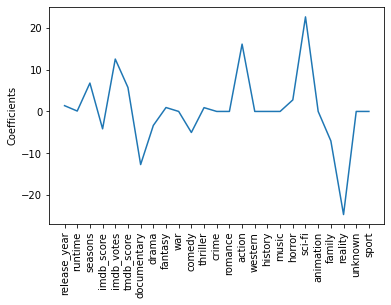

In [51]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Plot coefficients
plt.plot(range(X.shape[1]), lasso.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylabel('Coefficients')
plt.savefig("LassoResid.jpg")
plt.show()

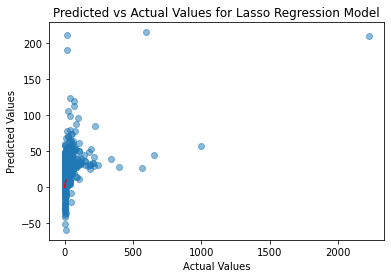

In [52]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 10], [0, 10], 'r-')
plt.title("Predicted vs Actual Values for Lasso Regression Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Ridge Regression

Mean Squared Error: 6720.671088270719
R-Squared: 0.14


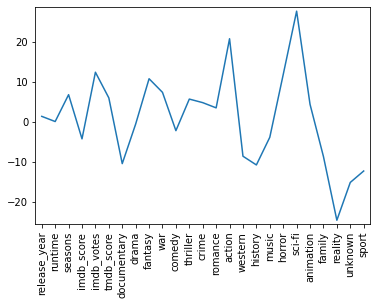

In [53]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print("R-Squared: {:.2f}".format(r2))

# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(range(X.shape[1]), ridge.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.margins(0.02)
plt.show()

## Linear Regression

In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r_squared))

Root Mean Squared Error: 81.98
R-squared: 0.14


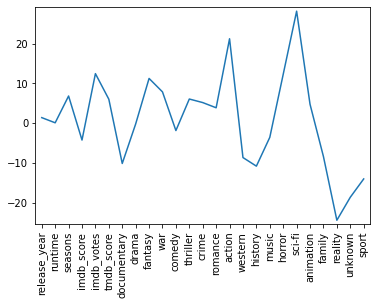

In [55]:
residuals = y_test - y_pred

plt.plot(range(X.shape[1]), lr_model.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.margins(0.02)
plt.show()

Root Mean Squared Error: 80.23
R-squared: 0.17


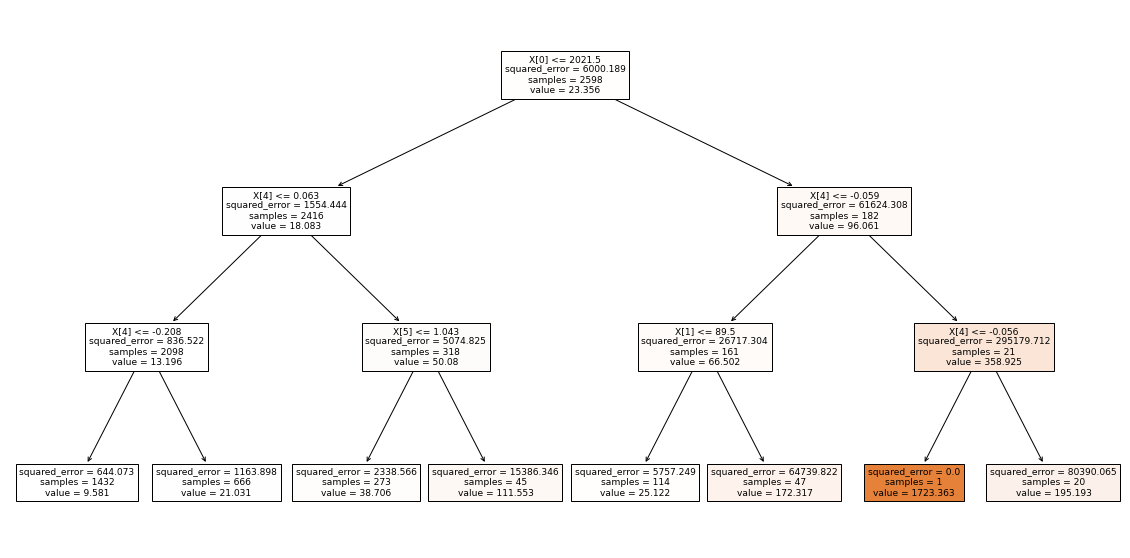

In [56]:
rf_model = RandomForestRegressor(max_depth=3,random_state=42)
rf_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

# cm=confusion_matrix(y_test, y_pred)
# acc=accuracy_score(y_test, y_pred)
# f1=f1_score(y_test,y_pred)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r_squared))
# print("Accuracy Score: {:.2f}".format(acc))
# print("f1 Score: {:.2f}".format(f1))

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True)
plt.savefig("rfr.jpg", dpi=300)
plt.show()

Accuracy: 0.33


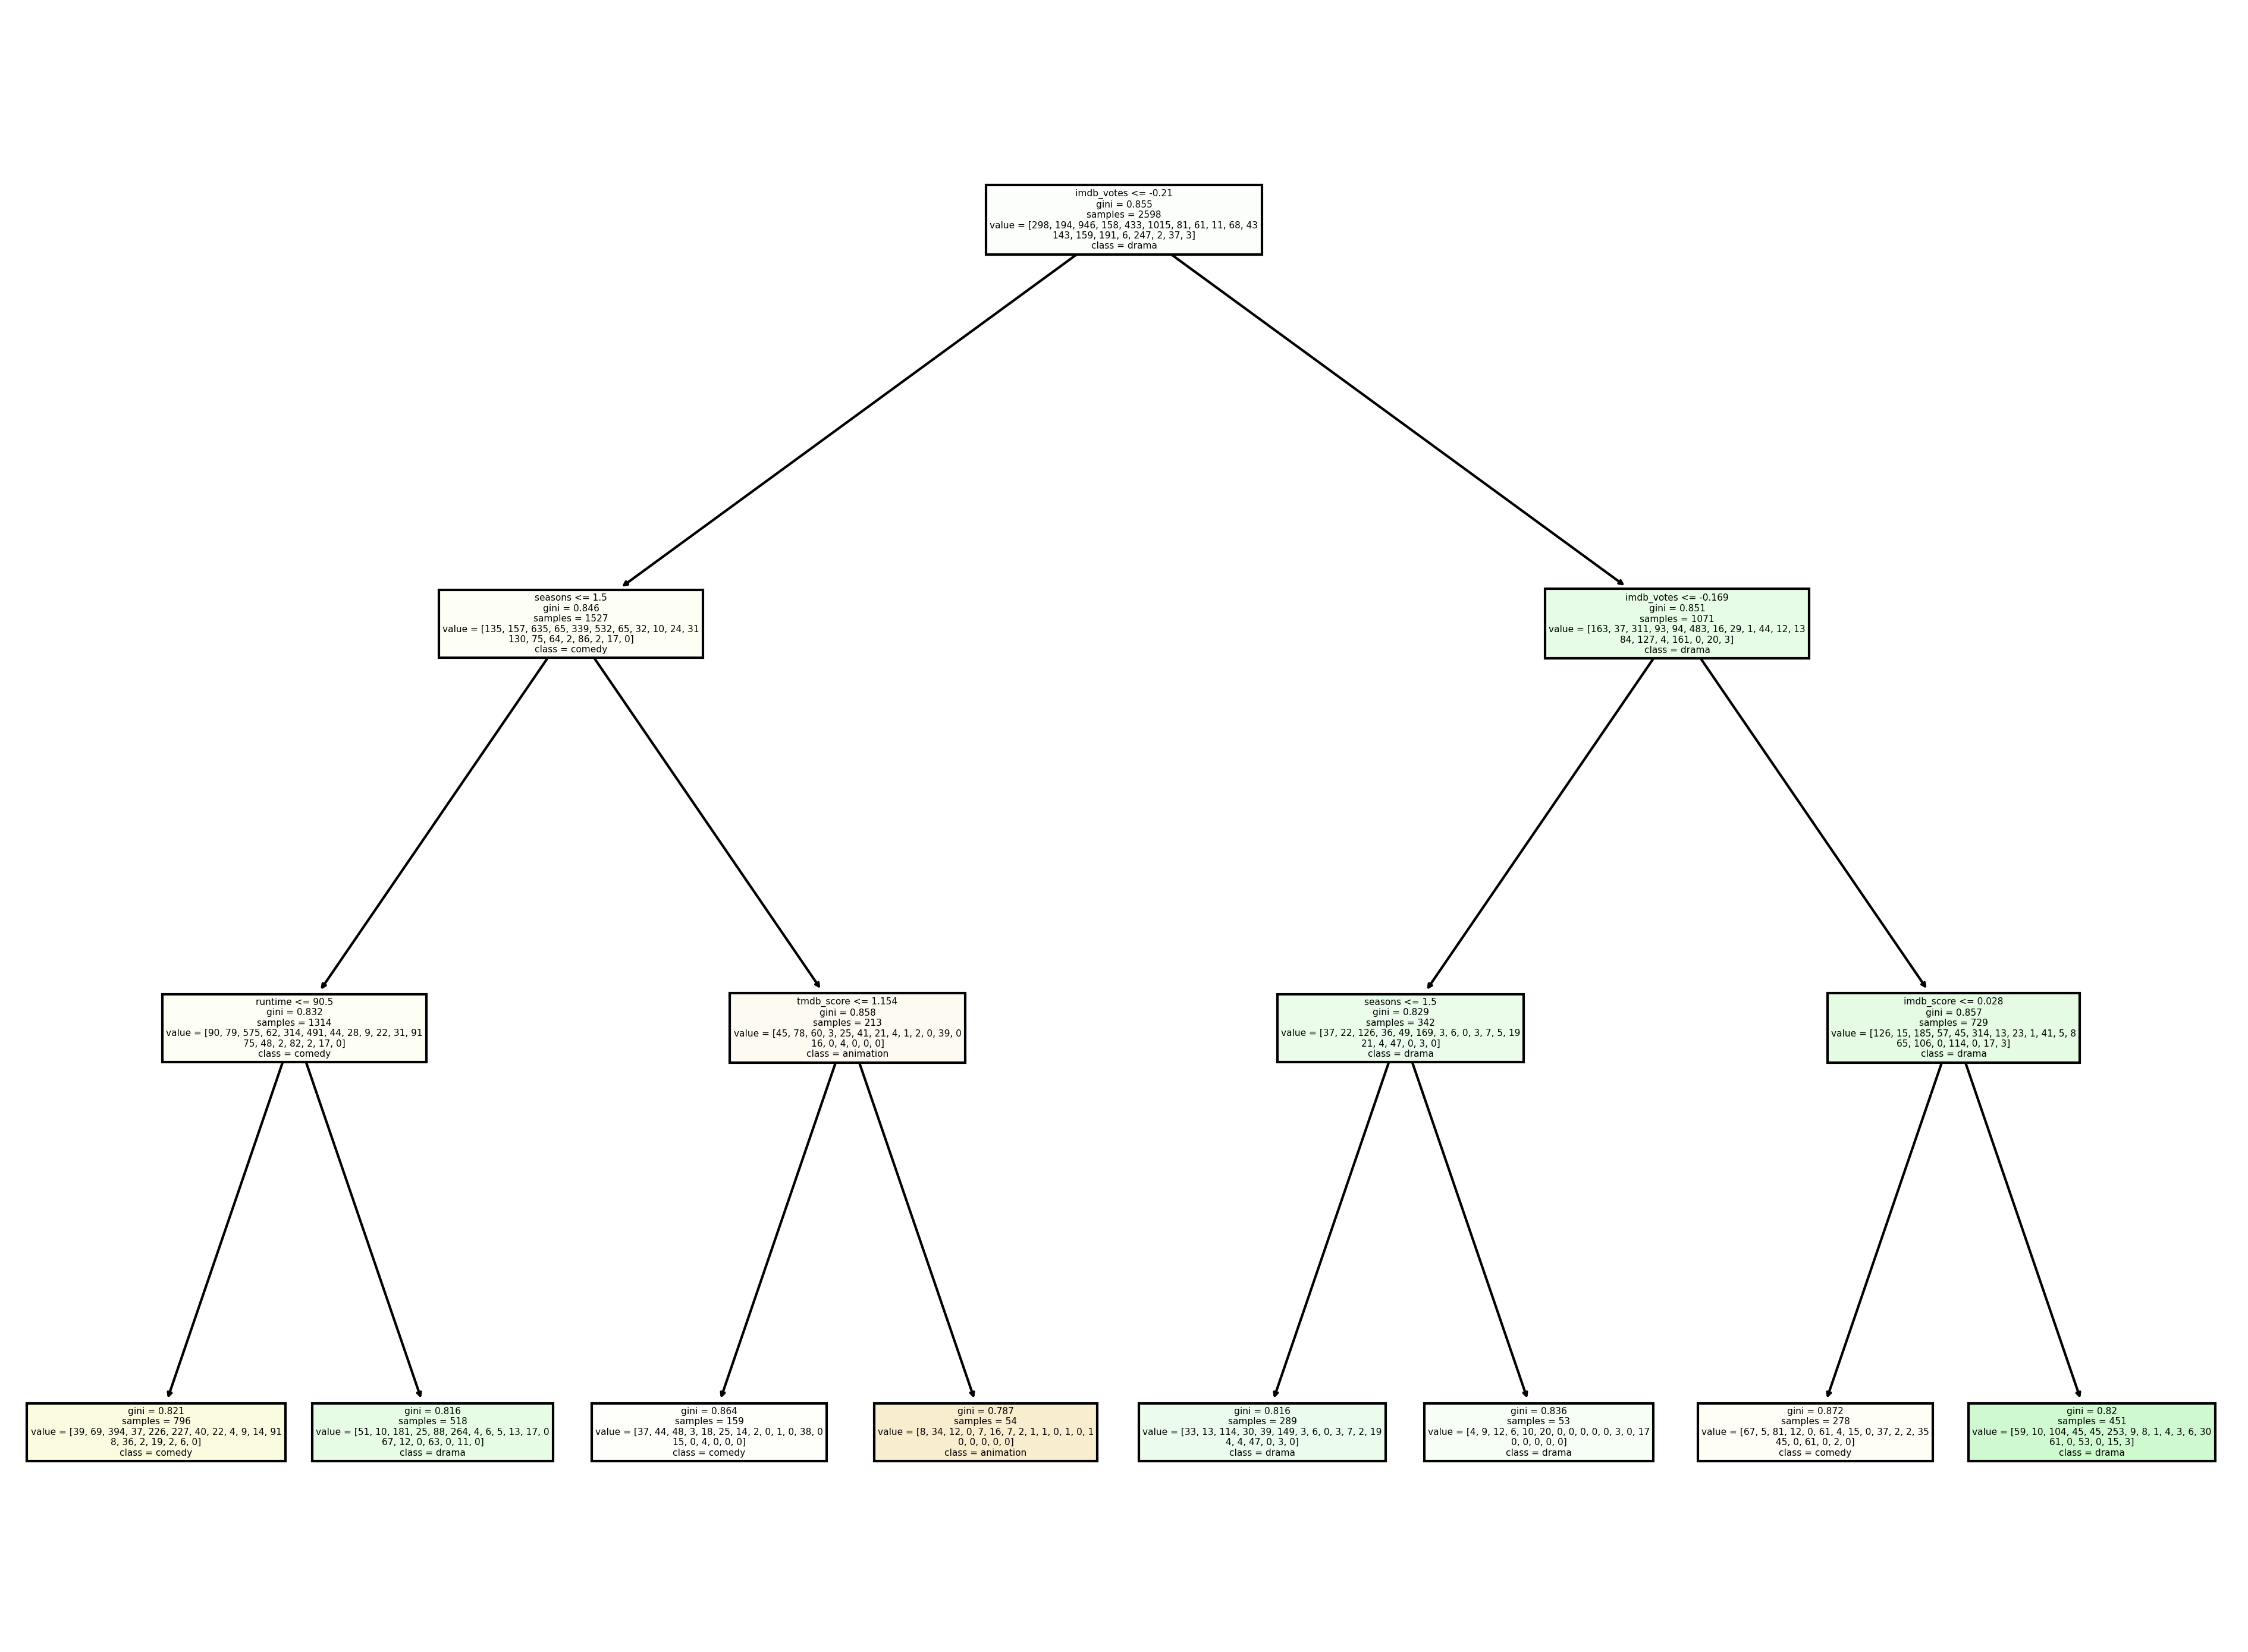

In [57]:
X = final_df.drop(columns=['genreMain','documentary', 'drama', 'fantasy', 'war', 'comedy', 'thriller',
       'crime', 'romance', 'action', 'western', 'history', 'music','horror', 'sci-fi', 'animation', 'family', 'reality', 'unknown',
       'sport'])
y = final_df['genreMain']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the random forest classifier
rfc = RandomForestClassifier(max_depth=3,random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model's performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 12), dpi=300)
plot_tree(rfc.estimators_[0], feature_names=X.columns, class_names=rfc.classes_, filled=True)
plt.savefig("rfc.jpg", dpi=300)
plt.show()

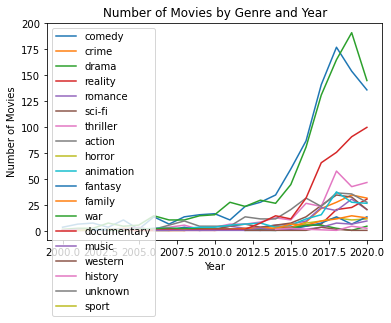

In [58]:
df_2000to2020 = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2020)]

# Group the data by release_year and genreMain, and count the number of rows in each group
genre_counts = df_2000to2020.groupby(['release_year', 'genreMain']).size().reset_index(name='count')

# Create a separate line plot for each genre
genres = genre_counts['genreMain'].unique()
for genre in genres:
    genre_data = genre_counts[genre_counts['genreMain'] == genre]
    plt.plot(genre_data['release_year'], genre_data['count'], label=genre)

# Set the title and axis labels
plt.title('Number of Movies by Genre and Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Add a legend and show the plot
plt.legend(loc='upper left')
plt.savefig("timeSeries.jpg", dpi=300)
plt.show()

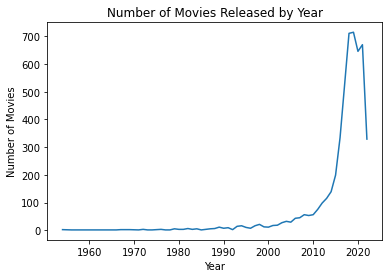

In [59]:
movie_counts = df.groupby('release_year').size().reset_index(name='count')

# Create a line plot of the movie counts by year
plt.plot(movie_counts['release_year'], movie_counts['count'])

# Set the title and axis labels
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()

<AxesSubplot:>

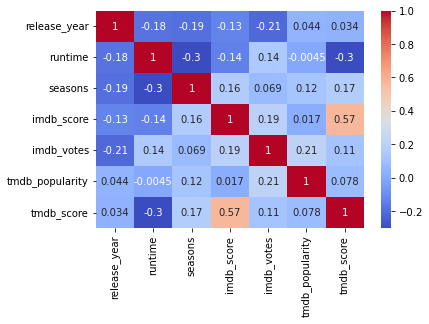

In [60]:
corr_matrix = df.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')